**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff_tot.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
dat_rank_diff_tot = dat

print(dim(dat))
head(dat)

[1] 417  14


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,ranknorm_ASTARR,ranknorm_WSTARR,ranknorm_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,0.05995204,0.2829736,0.4436451,-0.2230216,-0.38369305,-0.1606715,-0.7261479,-1.2366712,-0.5649234
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,0.25899281,0.5179856,0.3285372,-0.2589928,-0.06954436,0.1894484,-0.8432685,-0.2241466,0.6661037
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,0.52997602,0.3573141,0.5755396,0.1726619,-0.04556355,-0.2182254,0.5621790,-0.1468547,-0.7672840
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,0.13189448,0.4700240,0.8729017,-0.3381295,-0.74100719,-0.4028777,-1.1009339,-2.3883212,-1.4165244
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,0.04796163,0.7314149,0.5299760,-0.6834532,-0.48201439,0.2014388,-2.2252918,-1.5535681,0.7082622
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,0.52038369,0.6690647,0.9088729,-0.1486811,-0.38848921,-0.2398082,-0.4840986,-1.2521295,-0.8431693


In [3]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "List_combine_Annotation.RDS"
fpath = file.path(fdiry, fname)
lst = readRDS(fpath)

lst_peak_annot = lst
cat(names(lst), "\n\n")
cat(colnames(lst[[1]]), "\n\n")
for(dat in lst){
    print(dim(dat))
    print(head(dat, 3))
    cat("\n")
}

 

Chrom Start End Peak Region Name Label 

[1] 4587    7
# A tibble: 3 × 7
  Chrom     Start       End Peak                     Region Name           Label
  <chr>     <dbl>     <dbl> <chr>                    <chr>  <chr>          <chr>
1 chr8  126778902 126779728 chr8_126778902_126779728 MYC    CTCF-only,CTC… 0    
2 chr8  126782925 126783318 chr8_126782925_126783318 MYC    CTCF-only,CTC… 0    
3 chr8  126804776 126805825 chr8_126804776_126805825 MYC    CTCF-only,CTC… 0    

[1] 6255    7
# A tibble: 3 × 7
  Chrom     Start       End Peak                     Region Name  Label
  <chr>     <dbl>     <dbl> <chr>                    <chr>  <chr> <chr>
1 chr8  126778902 126779728 chr8_126778902_126779728 MYC    ELK1  0    
2 chr8  126782925 126783318 chr8_126782925_126783318 MYC    ELK1  0    
3 chr8  126804776 126805825 chr8_126804776_126805825 MYC    ELK1  0    

[1] 417   7
# A tibble: 3 × 7
  Chrom     Start       End Peak                     Region Name  Label
  <chr>     <dbl>     <

## Plot

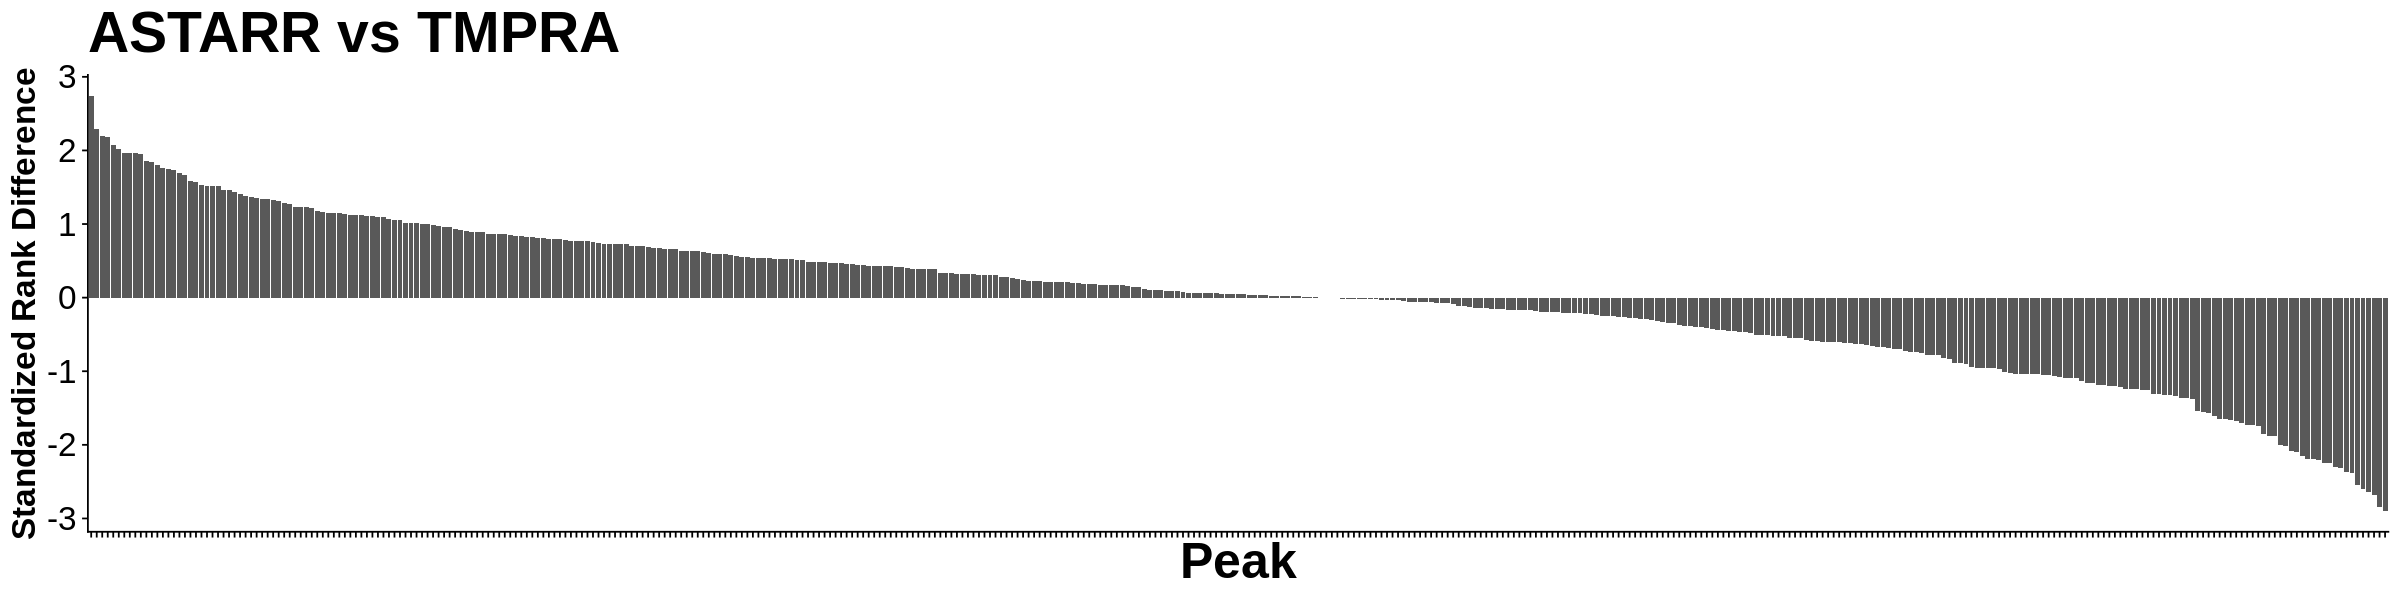

In [70]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

###
lst = split(dat, dat$Assay)
dat = lst[[1]]

###
dat   = dat %>% arrange(-Value)
peaks = dat$Peak
dat$Peak = factor(dat$Peak, levels=peaks)

###
txt = unique(dat$Assay)
gpt = ggplot(dat, aes(x=Peak, y=Value)) + 
    geom_bar(stat = "identity") +
    labs(title=txt, y="Standardized Rank Difference") +
    theme_cowplot() + 
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=20),
          axis.title.y = element_text(size=20),
          title =element_text(size=30, face='bold'),
         legend.position = "none")

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

In [64]:
lst = lst_peak_annot
lst_gpt_annot = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    gpt = ggplot(dat, aes(x=Peak, y=Name, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = c("1" = "black", "0" = "white")) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=30),
              #axis.ticks.x = element_blank(),
              legend.position = "none")
    return(gpt)
})

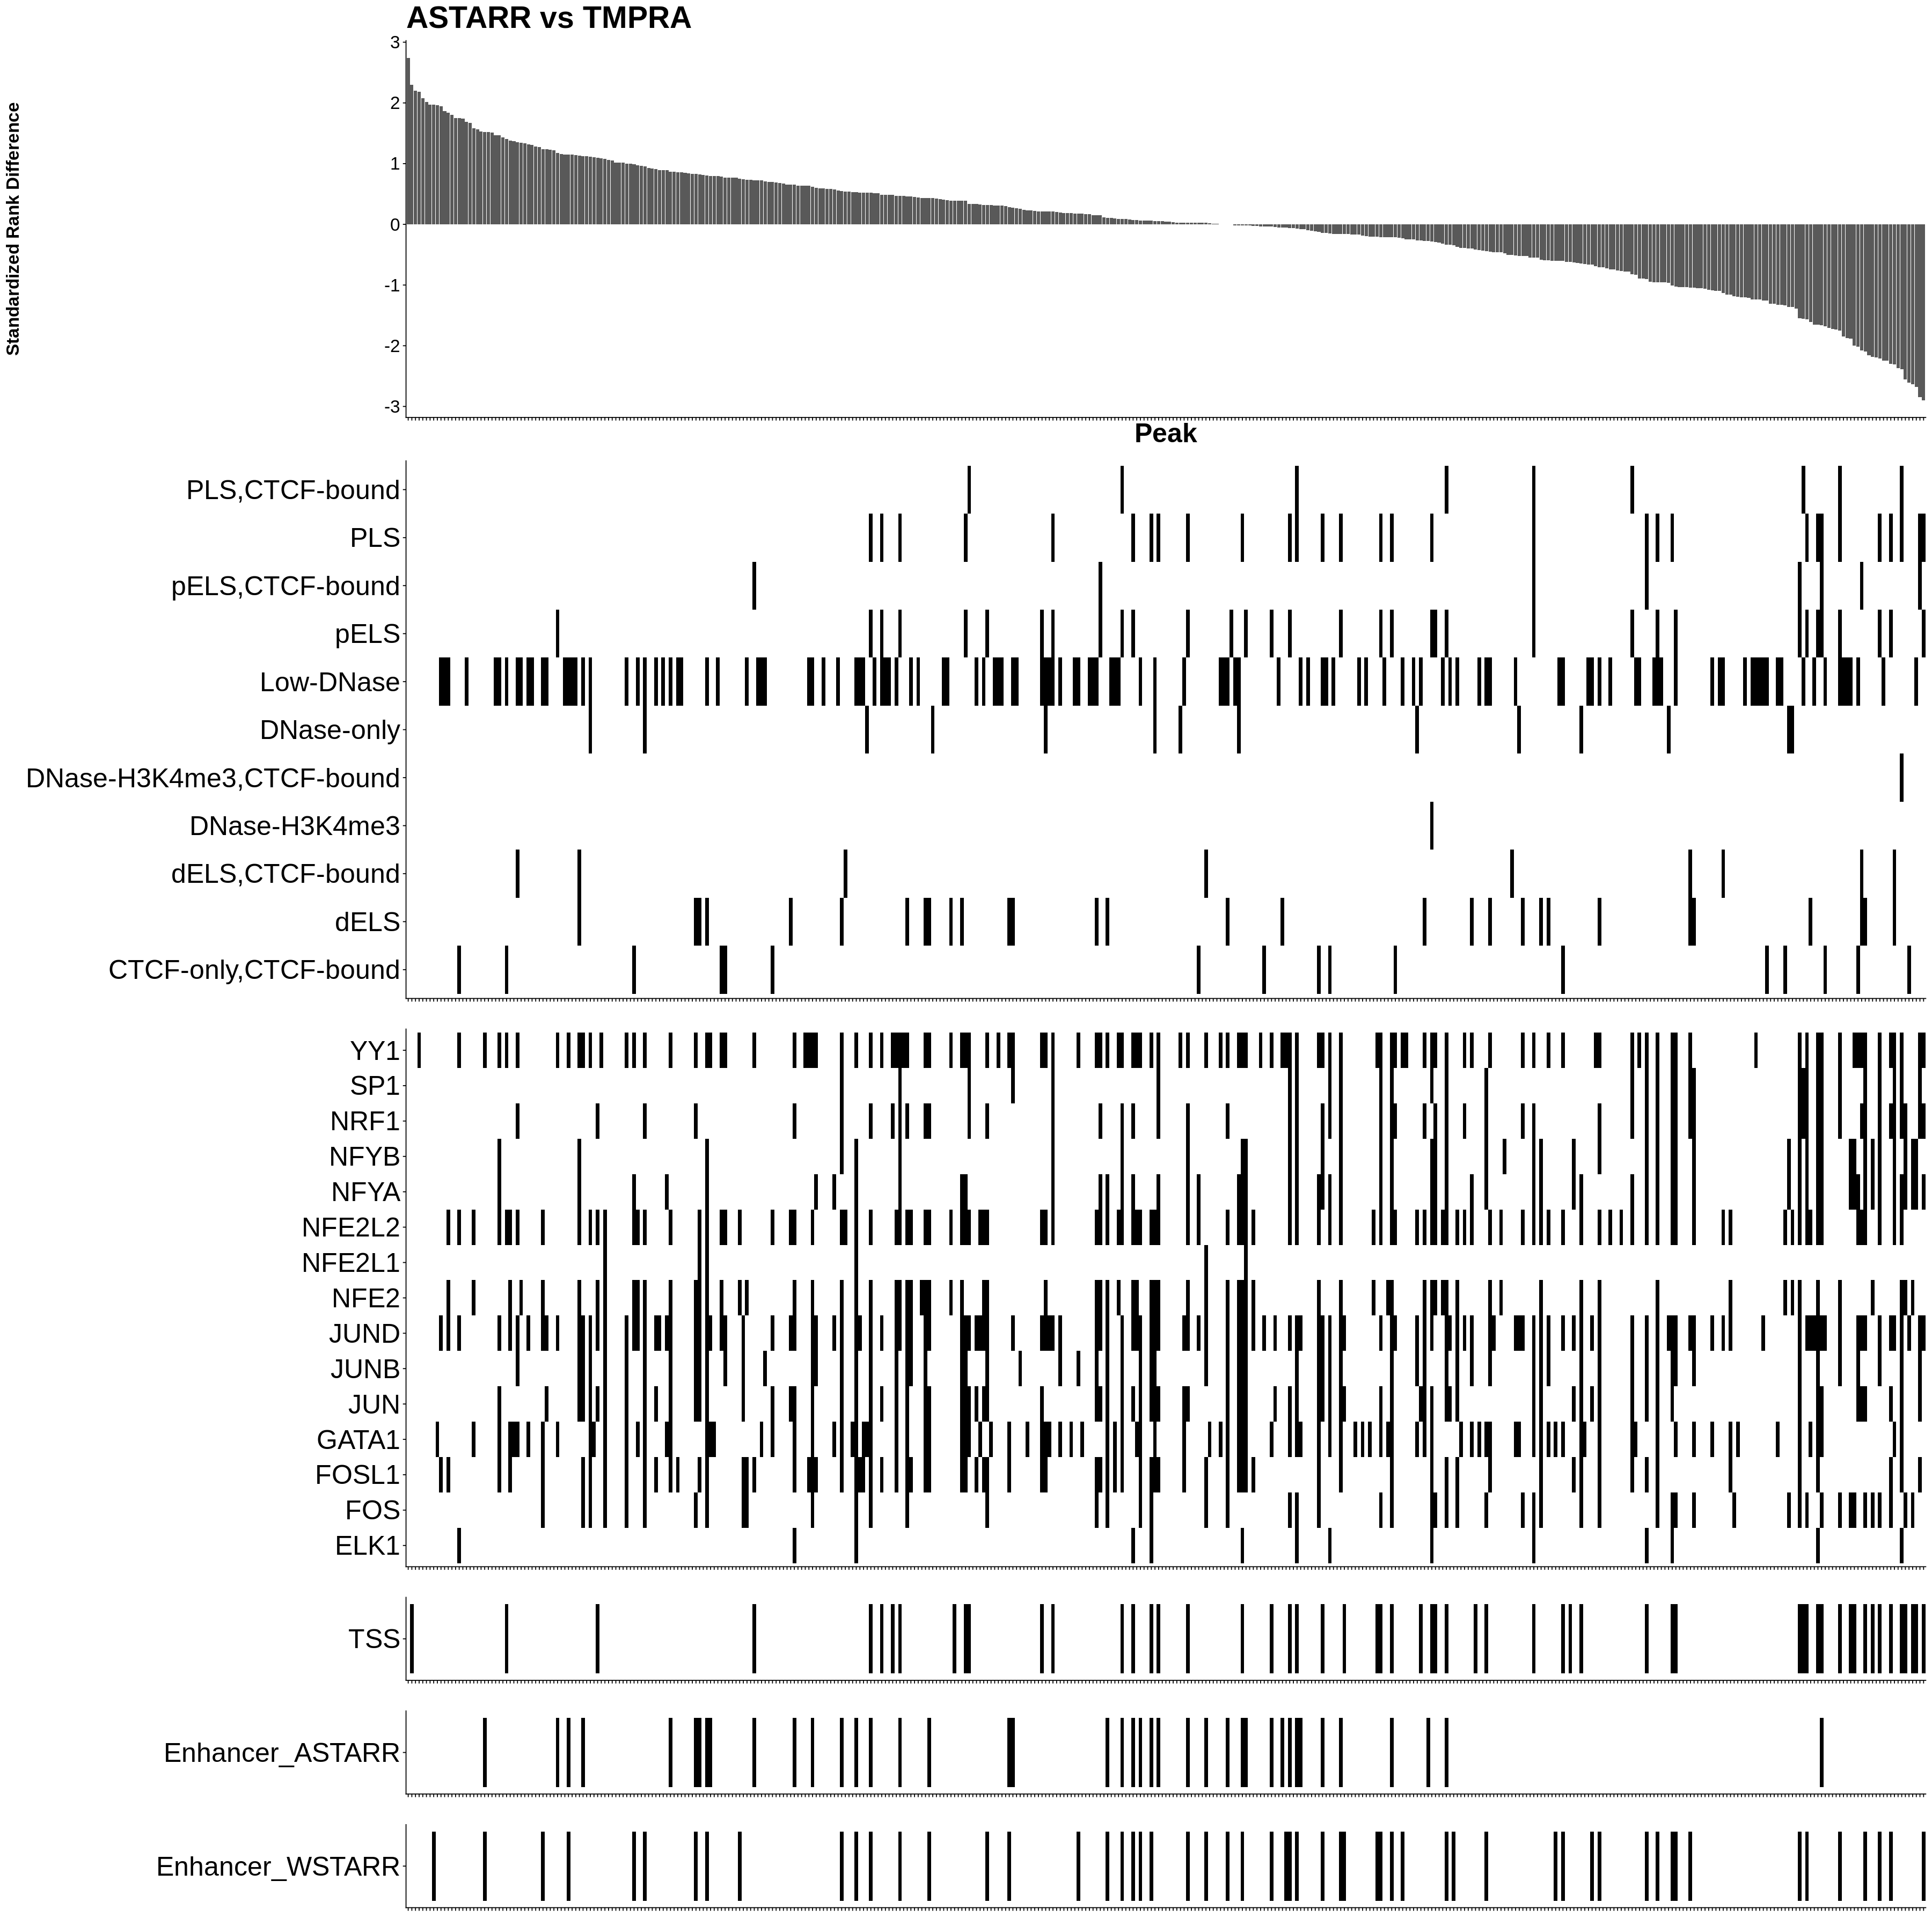

In [65]:
lst_gpt = list(gpt)
lst_gpt = append(lst_gpt, lst_gpt_annot)

options(repr.plot.height=30, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, 
          ncol=1, 
          align = "v",
          rel_heights = c(4, 5, 5, 1, 1, 1, 2))

## count cCREs

In [146]:
dat_ant = lst_peak_annot[[3]] %>% dplyr::filter(Label == "1") %>% dplyr::select(-Label)

print(dim(dat_ant))
head(dat_ant)

[1] 57  6


Chrom,Start,End,Peak,Region,Name
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr8,127735036,127736676,chr8_127735036_127736676,MYC,TSS
chr8,127793817,127795585,chr8_127793817_127795585,MYC,TSS
chr8,127889784,127890718,chr8_127889784_127890718,MYC,TSS
chr8,127948458,127950611,chr8_127948458_127950611,MYC,TSS
chr8,127959623,127961065,chr8_127959623_127961065,MYC,TSS
chr8,128048113,128049711,chr8_128048113_128049711,MYC,TSS


In [ ]:
dat_sig = dat_rank_diff_tot
dat = dat_sig %>% 
    dplyr::select(Peak, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak) %>%
    dplyr::mutate(Assay = recode(
            Assay, 
            'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
            'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
            'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
        ))

lst = split(dat, dat$Assay)
head(lst[[1]])

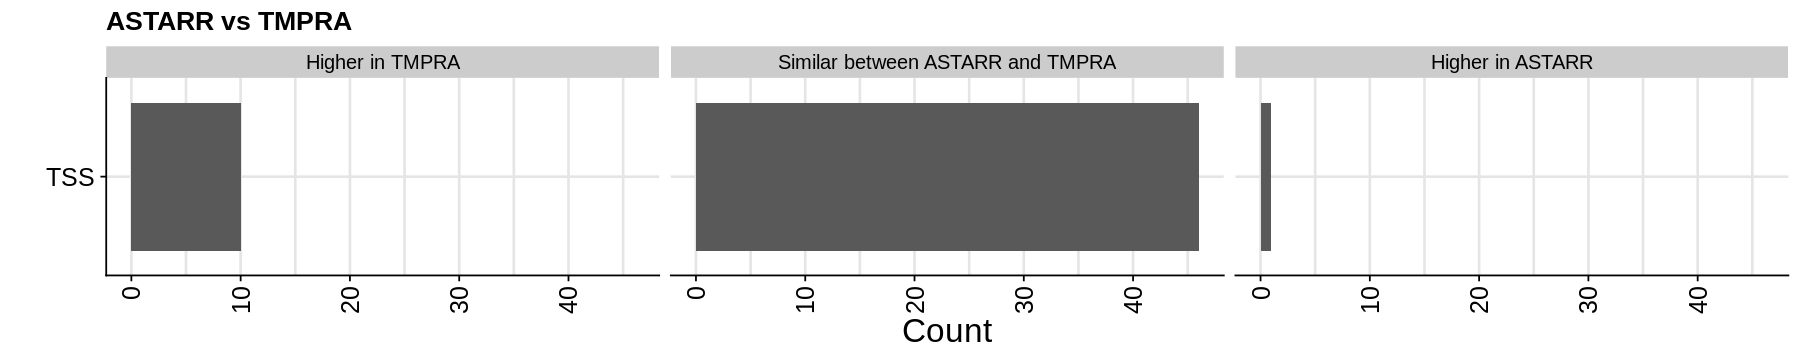

In [148]:
dat = lst[[1]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in TMPRA", "Similar between ASTARR and TMPRA", "Higher in ASTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

txt = unique(dat$Assay)
gp1 = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

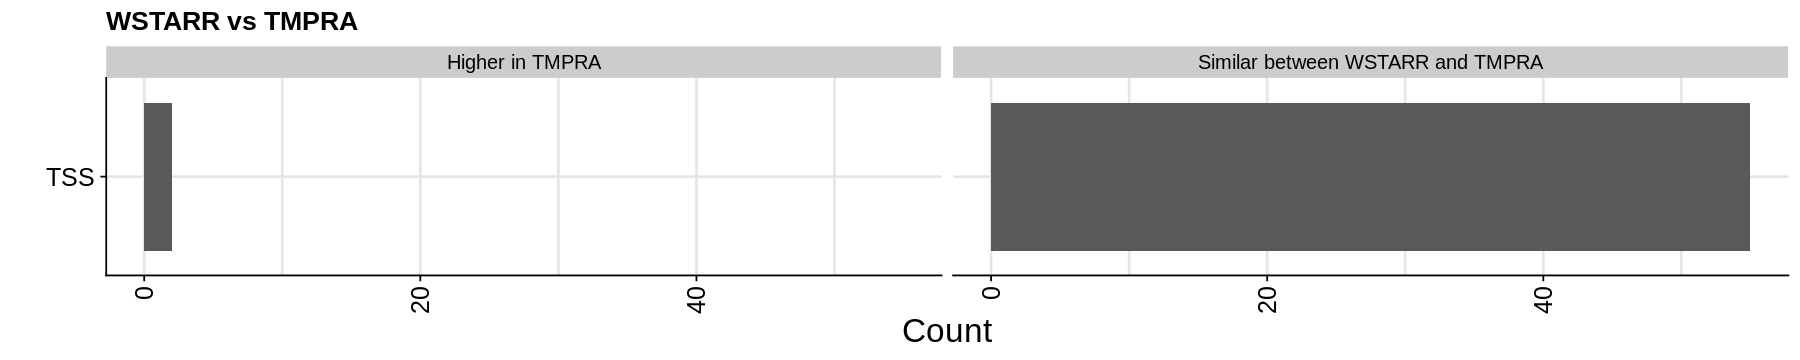

In [152]:
dat = lst[[2]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in WSTARR", "Similar between ASTARR and WSTARR", "Higher in ASTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

txt = unique(dat$Assay)
gp2 = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

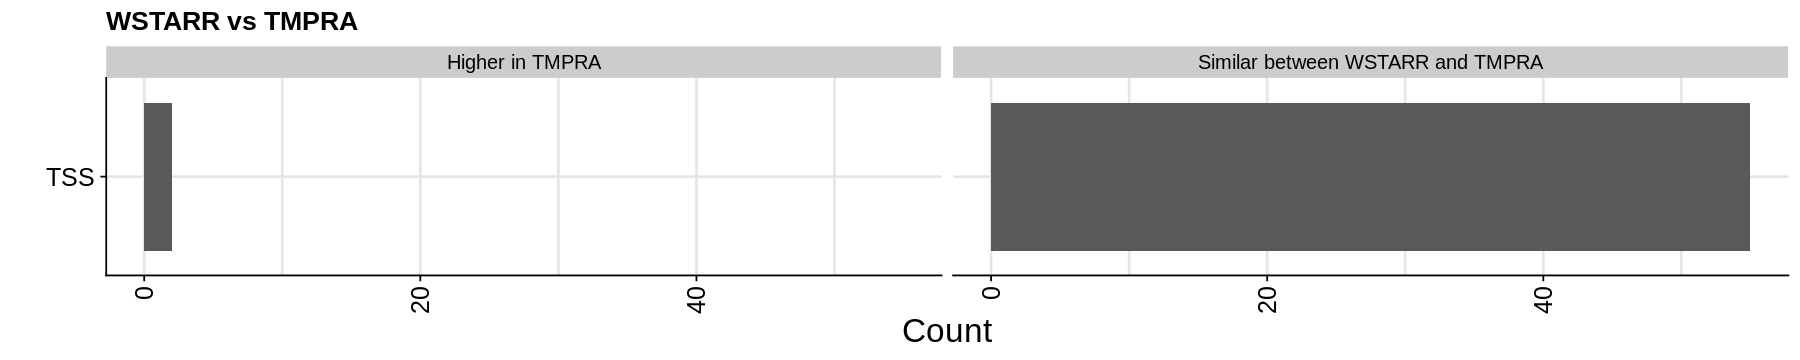

In [153]:
dat = lst[[3]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in TMPRA", "Similar between WSTARR and TMPRA", "Higher in WSTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

txt = unique(dat$Assay)
gpt = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [138]:
dat_ant = lst_peak_annot[[1]] %>% dplyr::filter(Label == "1") %>% dplyr::select(-Label)

print(dim(dat_ant))
head(dat_ant)

[1] 282   6


Chrom,Start,End,Peak,Region,Name
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr8,126820465,126821393,chr8_126820465_126821393,MYC,"CTCF-only,CTCF-bound"
chr8,126824093,126824987,chr8_126824093_126824987,MYC,"CTCF-only,CTCF-bound"
chr8,126876521,126877247,chr8_126876521_126877247,MYC,"CTCF-only,CTCF-bound"
chr8,127724898,127726838,chr8_127724898_127726838,MYC,"CTCF-only,CTCF-bound"
chr11,61567108,61567997,chr11_61567108_61567997,FADS,"CTCF-only,CTCF-bound"
chr11,61627905,61628859,chr11_61627905_61628859,FADS,"CTCF-only,CTCF-bound"


In [139]:
dat_sig = dat_rank_diff_tot

print(dim(dat_sig))
head(dat_sig)

[1] 417  14


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,ranknorm_ASTARR,ranknorm_WSTARR,ranknorm_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,0.05995204,0.2829736,0.4436451,-0.2230216,-0.38369305,-0.1606715,-0.7261479,-1.2366712,-0.5649234
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,0.25899281,0.5179856,0.3285372,-0.2589928,-0.06954436,0.1894484,-0.8432685,-0.2241466,0.6661037
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,0.52997602,0.3573141,0.5755396,0.1726619,-0.04556355,-0.2182254,0.5621790,-0.1468547,-0.7672840
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,0.13189448,0.4700240,0.8729017,-0.3381295,-0.74100719,-0.4028777,-1.1009339,-2.3883212,-1.4165244
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,0.04796163,0.7314149,0.5299760,-0.6834532,-0.48201439,0.2014388,-2.2252918,-1.5535681,0.7082622
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,0.52038369,0.6690647,0.9088729,-0.1486811,-0.38848921,-0.2398082,-0.4840986,-1.2521295,-0.8431693


In [104]:
dat = dat_sig %>% 
    dplyr::select(Peak, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak) %>%
    dplyr::mutate(Assay = recode(
            Assay, 
            'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
            'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
            'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
        ))

lst = split(dat, dat$Assay)
head(lst[[1]])

Peak,Assay,Value
<chr>,<chr>,<dbl>
chr11_61554569_61556228,ASTARR vs TMPRA,-1.2366712
chr11_61560645_61561556,ASTARR vs TMPRA,-0.2241466
chr11_61567108_61567997,ASTARR vs TMPRA,-0.1468547
chr11_61580592_61581826,ASTARR vs TMPRA,-2.3883212
chr11_61587170_61588742,ASTARR vs TMPRA,-1.5535681
chr11_61594868_61596571,ASTARR vs TMPRA,-1.2521295


In [140]:
dat = lst[[1]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in TMPRA", "Similar between ASTARR and TMPRA", "Higher in ASTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

head(dat)

Assay,Label,Name,Count
<chr>,<fct>,<chr>,<int>
ASTARR vs TMPRA,Higher in TMPRA,"CTCF-only,CTCF-bound",2
ASTARR vs TMPRA,Higher in TMPRA,dELS,3
ASTARR vs TMPRA,Higher in TMPRA,"dELS,CTCF-bound",2
ASTARR vs TMPRA,Higher in TMPRA,"DNase-H3K4me3,CTCF-bound",1
ASTARR vs TMPRA,Higher in TMPRA,Low-DNase,3
ASTARR vs TMPRA,Higher in TMPRA,pELS,3


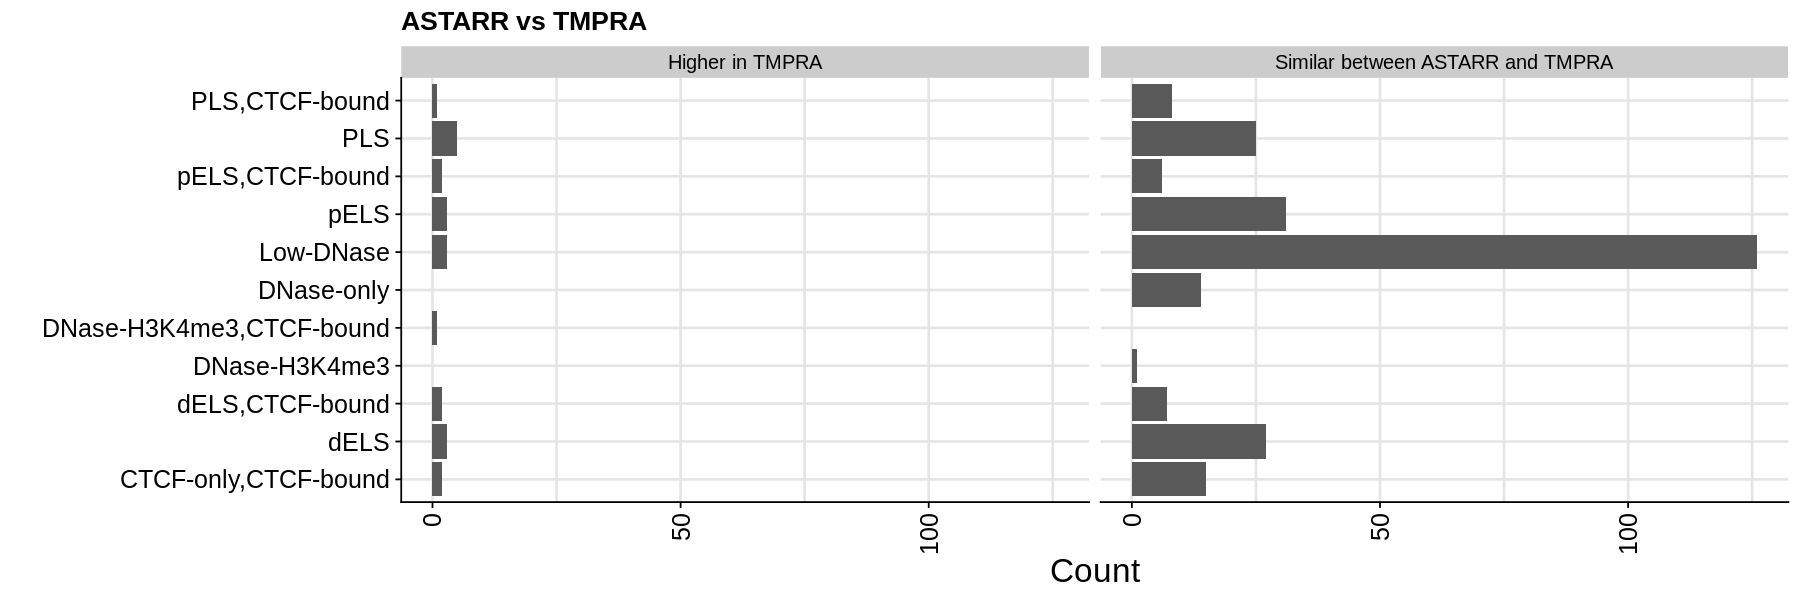

In [141]:
txt = unique(dat$Assay)
gpt = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

In [142]:
dat = lst[[2]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in WSTARR", "Similar between ASTARR and WSTARR", "Higher in ASTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

head(dat)

Assay,Label,Name,Count
<chr>,<fct>,<chr>,<int>
ASTARR vs WSTARR,Higher in WSTARR,dELS,1
ASTARR vs WSTARR,Higher in WSTARR,Low-DNase,2
ASTARR vs WSTARR,Higher in WSTARR,pELS,3
ASTARR vs WSTARR,Higher in WSTARR,"pELS,CTCF-bound",1
ASTARR vs WSTARR,Higher in WSTARR,PLS,4
ASTARR vs WSTARR,Higher in WSTARR,"PLS,CTCF-bound",1


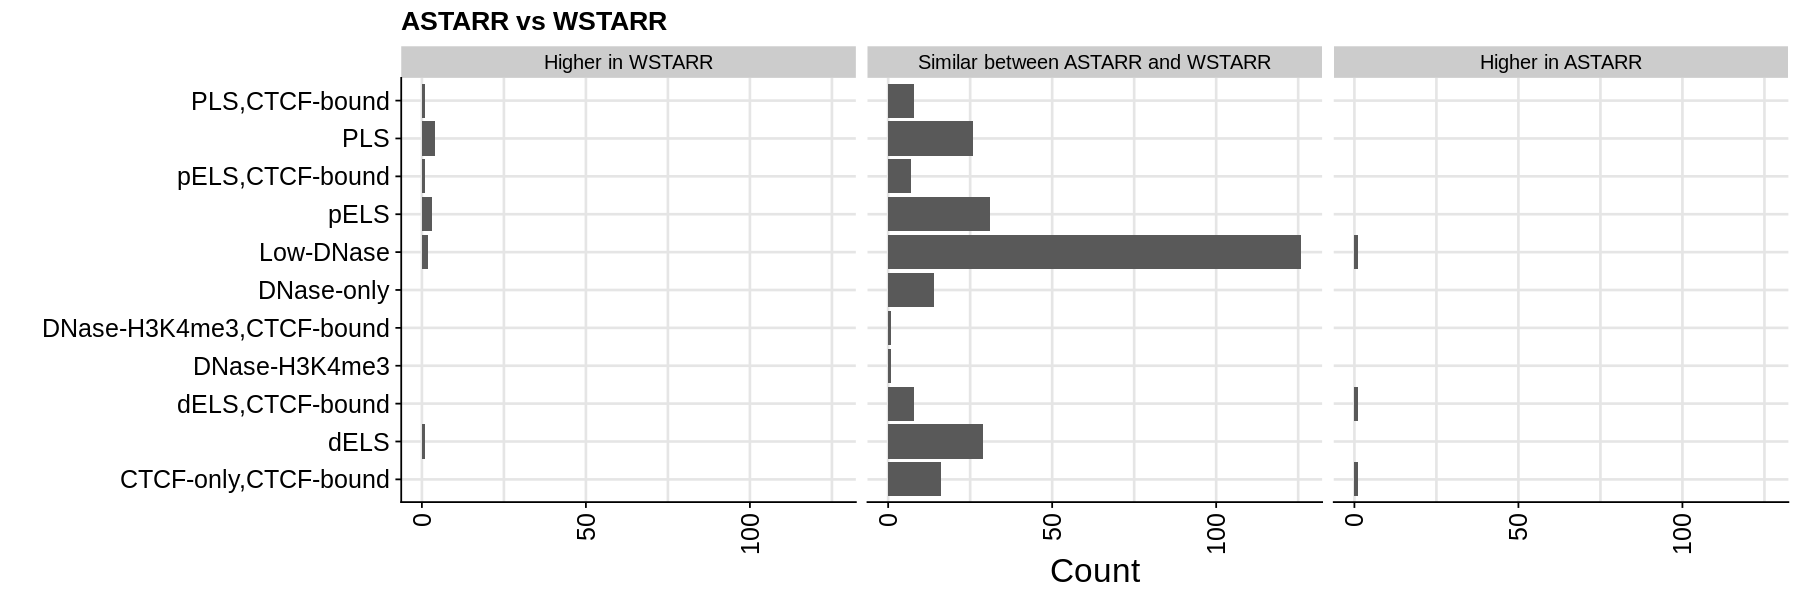

In [143]:
txt = unique(dat$Assay)
gpt = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

In [144]:
dat = lst[[3]]
dat = dat %>% mutate(
    Label = cut(
        Value, 
        breaks = c(-Inf, -2, 2, Inf),
        labels = c("Higher in TMPRA", "Similar between WSTARR and TMPRA", "Higher in WSTARR")
    ))

dat = inner_join(dat, dat_ant, by=c("Peak"))
dat = dat %>% 
    group_by(Assay, Label, Name) %>% 
    summarize(Count = n(), .groups="drop")

head(dat)

Assay,Label,Name,Count
<chr>,<fct>,<chr>,<int>
WSTARR vs TMPRA,Higher in TMPRA,"CTCF-only,CTCF-bound",3
WSTARR vs TMPRA,Higher in TMPRA,Low-DNase,1
WSTARR vs TMPRA,Similar between WSTARR and TMPRA,"CTCF-only,CTCF-bound",14
WSTARR vs TMPRA,Similar between WSTARR and TMPRA,dELS,30
WSTARR vs TMPRA,Similar between WSTARR and TMPRA,"dELS,CTCF-bound",9
WSTARR vs TMPRA,Similar between WSTARR and TMPRA,DNase-H3K4me3,1


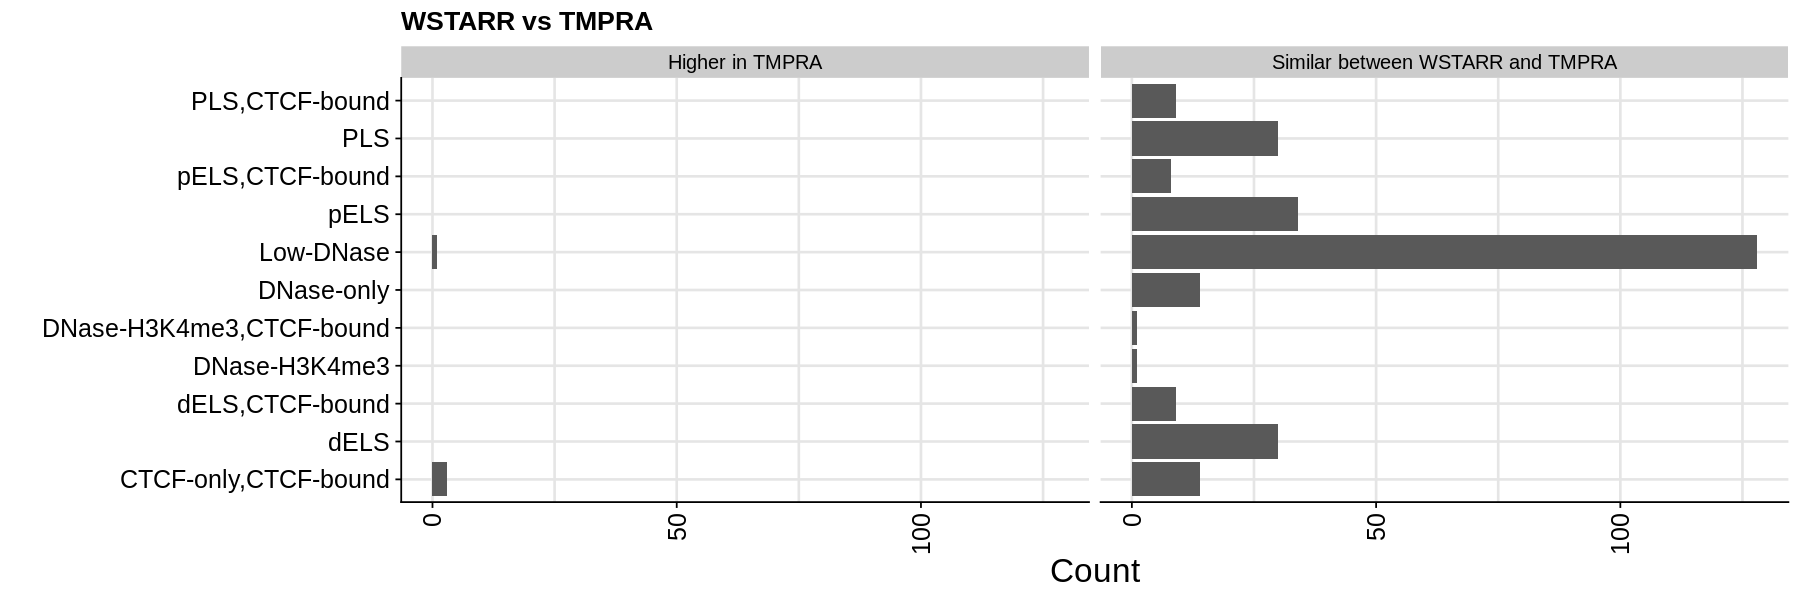

In [145]:
txt = unique(dat$Assay)
gpt = ggplot(dat, aes(x=Name, y=Count)) + 
    geom_bar(stat="identity") + 
    labs(x="", title=txt) +
    coord_flip() +
    facet_wrap(~Label) +
    theme_cowplot() +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)